# The Space Race datasets analysis
The Space Race datasets used in this analysis was obtained from kaggle and it includes all the space missions since the beginning of Space Race (1957).

Datasets: https://www.kaggle.com/agirlcoding/all-space-missions-from-1957/code

## The inferences I analysed in this datasets are;

1. Firstly, let’s analyze how many missions were successfully launched and how many of them were failures using countplot and pie chart.

2. Analyze the status of mission rockets. 

3. Now I would analyze based on the country that has launched a space mission.

4. Analysis based on the company who manufactured 

5. Classifying the database on success and failure of the mission by the most popular companies.

6. Analyze the yearly and monthly distribution of space missions (launch)


In [1]:
#import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from PIL import Image

import os, sys
import warnings
warnings.filterwarnings('ignore')
import pandas.util.testing as tm

In [2]:
#import data
data = pd.read_csv('/Users/wuraolaifeoluwa/Documents/Rasheed data doc /datasets/Space_Corrected.csv')

## Exploratory Data Analysis

In [3]:
data.shape

(4324, 9)

In [4]:
#Look at 5 first rows from the dataset
data.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
#Quick look into the columns and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [6]:
# We observe from above result that unnamed columns are redundant, so we will remove them (i.e drop column ' unnamed: 0 and unnamed: 0.1')

data = data.drop('Unnamed: 0', axis = 1)
data = data. drop('Unnamed: 0.1', axis = 1)

In [7]:
# check for missing values
data.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [8]:
data[' Rocket'].nunique()

56

In [9]:
#Rocket column has many missing values, as the datatype is string, let's replace it with mode value
data[' Rocket'].mode()[0]

'450.0 '

In [10]:
#since '450.0' is the most occuring value in 'Rocket' column we fill the missing value with it.
data[' Rocket'] = data[' Rocket'].fillna(data[' Rocket'].mode()[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         4324 non-null   object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [12]:
# STATISTICS 

stats = pd.DataFrame(data.describe().T)
stats

,count,unique,top,freq
Company Name,4324,56,RVSN USSR,1777
Location,4324,137,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
Datum,4324,4319,"Tue Jun 26, 1973",2
Detail,4324,4278,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6
Status Rocket,4324,2,StatusRetired,3534
Rocket,4324,56,450.0,3496
Status Mission,4324,4,Success,3879


# 1. Firstly, let’s analyze how many missions were successfully launched and how many of them were failures using countplot and pie chart.

<AxesSubplot:xlabel='Status Mission', ylabel='count'>

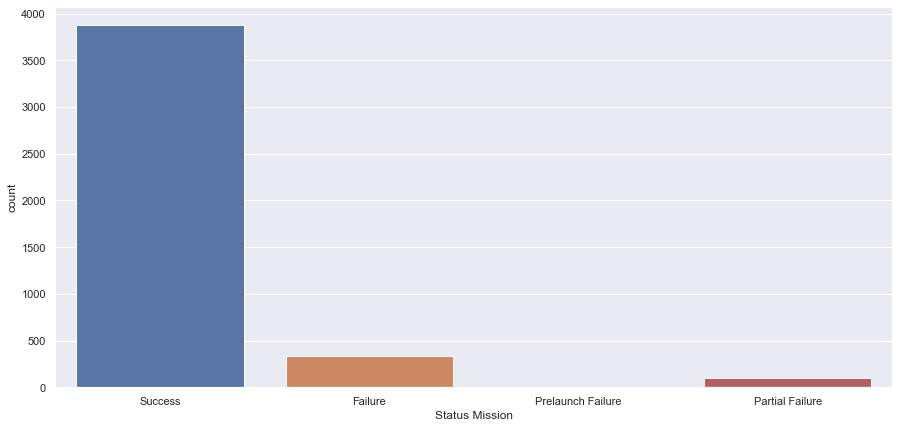

In [13]:
#Let's analysis status mission using piechart and countplot
sns.set_theme(style="darkgrid")

plt.figure(figsize = (15,7))
sns.countplot('Status Mission', data = data)

Analysis of the countplot shows;
1. the mission status has a higher success rate while;
2. prelaunch failure is Negligible or None 
Therefore, the percentage of success rate of the space mission is higher than the failure mission

In [14]:
data['Status Mission'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

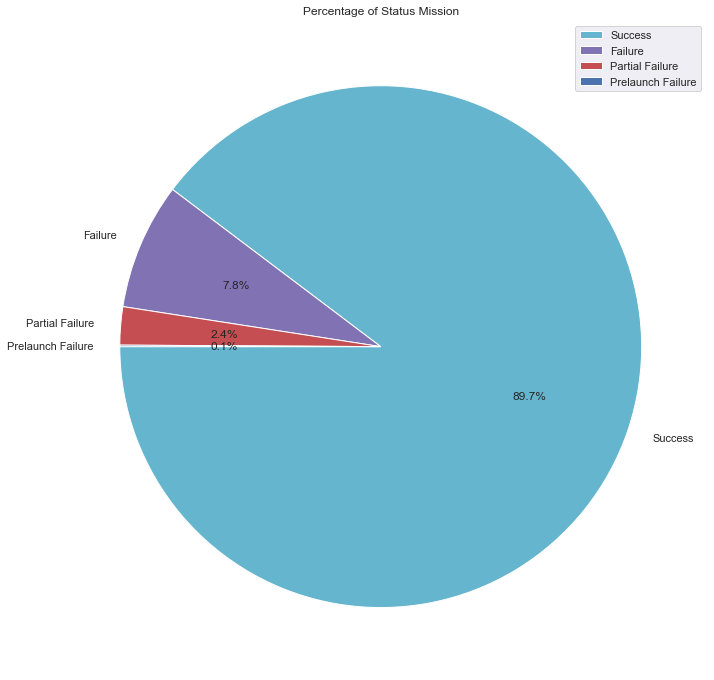

In [15]:
plt.figure(figsize = (20,12))
label = ['Success', 'Failure', 'Partial Failure','Prelaunch Failure']

plt.pie(data['Status Mission'].value_counts(), 
        labels = label,
        colors = ['c','m','r','b'],
        #shadow = True,
        labeldistance = 1.1,
        startangle = 180,
        autopct ='%1.1f%%',
       )

plt.legend(['Success', 'Failure', 'Partial Failure','Prelaunch Failure'])
plt.title('Percentage of Status Mission')
plt.show()

Observation

This shows that mission status has a more successful rate with a percentage of 89.7%, followed by failure to partial failure. The least mission status is found to be a prelaunch failure with a percentage of 0.1%.


# 2. Analyze the status of mission rockets. 

In [16]:
data['Status Rocket'].value_counts()

StatusRetired    3534
StatusActive      790
Name: Status Rocket, dtype: int64

<AxesSubplot:xlabel='Status Rocket', ylabel='count'>

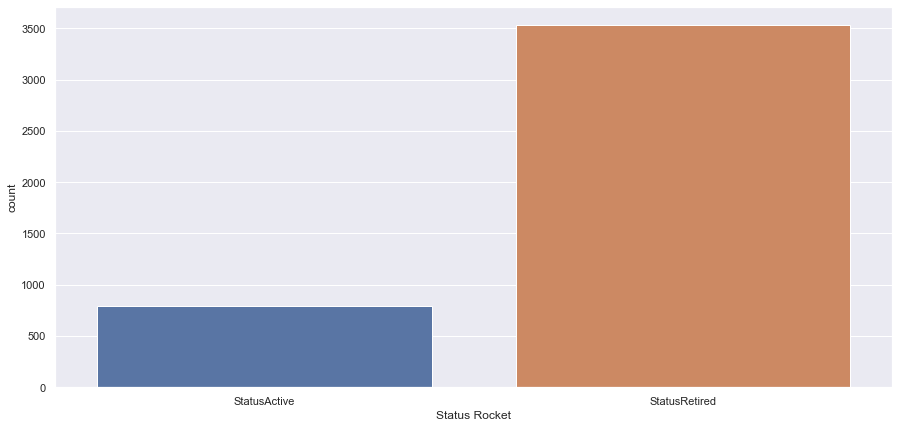

In [17]:
plt.figure(figsize = (15,7))

sns.countplot('Status Rocket', data = data)

The above shows that less number of Rockets are active while majority of rockets are retired.

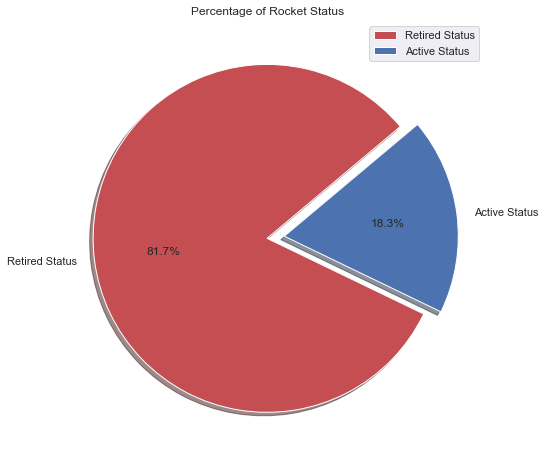

In [18]:
plt.figure(figsize = (15,8))


plt.pie(data['Status Rocket'].value_counts(), 
        labels = ['Retired Status','Active Status'],
        colors = ['r','b'],
        shadow = True,
        labeldistance = 1.1,
        startangle = 40,
        explode = (0,0.1),
        autopct ='%1.1f%%',
       )

plt.legend(['Retired Status','Active Status'])
plt.title('Percentage of Rocket Status')
plt.show()

Observation

The observation shows that a low number of Rockets are active compared to the retired rockets, where the majority of rockets (81.7%) are retired.


# 3. Now I would analyze based on the country that has launched a space mission.

In [19]:
# lets create a new column called country from the location column

coun_func = lambda x:x.split(',')[-1]
data['country'] = data['Location'].apply(coun_func)

In [20]:
data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,450.0,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [21]:
# let's analysis countrys thats explore the space 
#Top 7 countries
country_data = data['country'].value_counts()
country_data

 Russia                            1395
 USA                               1344
 Kazakhstan                         701
 France                             303
 China                              268
 Japan                              126
 India                               76
 Pacific Ocean                       36
 Iran                                13
 New Zealand                         13
 Israel                              11
 Kenya                                9
 Australia                            6
 North Korea                          5
 New Mexico                           4
 Brazil                               3
 South Korea                          3
 Barents Sea                          3
 Gran Canaria                         2
 Shahrud Missile Test Site            1
 Yellow Sea                           1
 Pacific Missile Range Facility       1
Name: country, dtype: int64

## to avoid clumsy plot, I selected 7 most popular countries that have launched the mission.

Text(0.5, 1.0, 'Top 7 country involved in space mission')

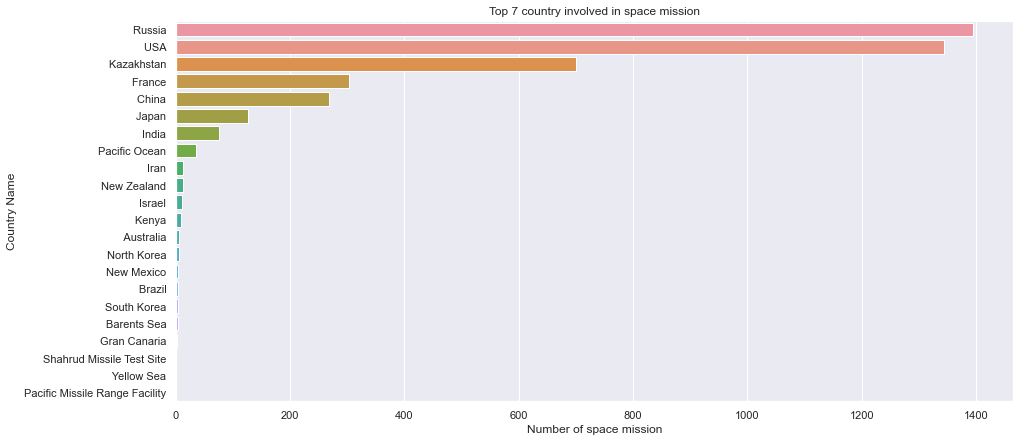

In [22]:
#since we have visualize the top 10 country chart that launched space vehicles, lets see top 10 countries with mission status
plt.figure(figsize = (15,7))
sns.barplot(x = country_data.values, y = country_data.index)

plt.xlabel('Number of space mission')
plt.ylabel('Country Name')
plt.title('Top 7 country involved in space mission')

Observation

From the datasets, 22 countries have launched space missions. Russia has the highest with (1395) launches followed by the USA (1344) to Kazakhstan(701) and the least with just 1 launch mission are Pacific Missile Range Facility, Yellow Sea, and Shahrud Missile Test Site.



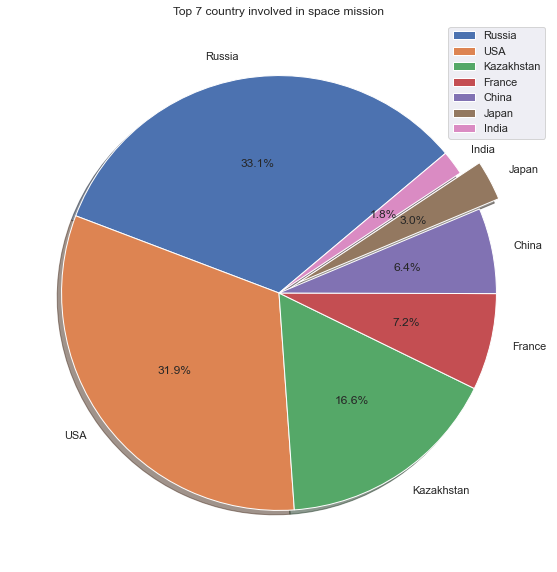

In [23]:
plt.figure(figsize = (15,10))


plt.pie(data['country'].value_counts().iloc[:7], 
        labels = ['Russia', 'USA', 'Kazakhstan', 'France', 'China', 'Japan','India'],
        #colors = ['r','b'],
        shadow = True,
        labeldistance = 1.1,
        startangle = 40,
        explode = (0,0,0,0,0,0.1,0),
        autopct ='%1.1f%%',
       )

plt.legend(['Russia', 'USA', 'Kazakhstan', 'France', 'China', 'Japan','India'])
plt.title('Top 7 country involved in space mission')
plt.show()

The plot gets clumsy if each and every country is plotted on it, so for visualiazation basis, 
I selected 7 top countries that has launched a mission, this shows Russia to have the highest percentage followed by USA and the least is India

In [24]:
##plt.figure(figsize = (15,7))

##sns.countplot(data['country'],  data = data, hue = 'Status Mission', order =  ['Russia', 'USA', 'Kazakhstan', 'France', 'China','Japan','India'])

# 4. Analysis based on the company who manufactured (to avoid clumsy plot, I selected 7 most popular companies.)

In [25]:
data['Company Name'].value_counts()

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ESA                   13
Rocket Lab            13
Eurockot              13
ISA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
CASIC                  5
UT                     5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [26]:
#Top 7 company
company_data = data['Company Name'].value_counts().iloc[:7]
company_data

RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
Name: Company Name, dtype: int64

## The plot gets clumsy if each and every company is plotted on it, so plotting 7 of the well-known company.

Text(0.5, 1.0, 'Top 7 company involved in space mission')

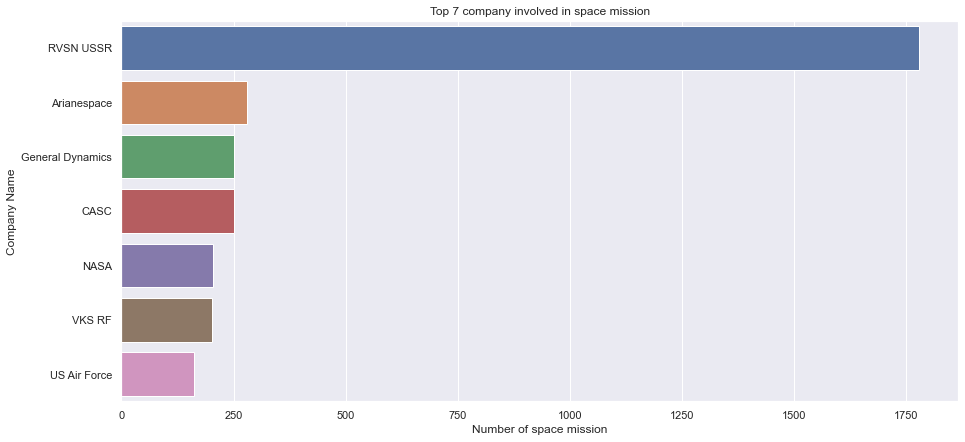

In [27]:
plt.figure(figsize = (15,7))
sns.barplot(x = company_data.values, y = company_data.index)

plt.xlabel('Number of space mission')
plt.ylabel('Company Name')
plt.title('Top 7 company involved in space mission')

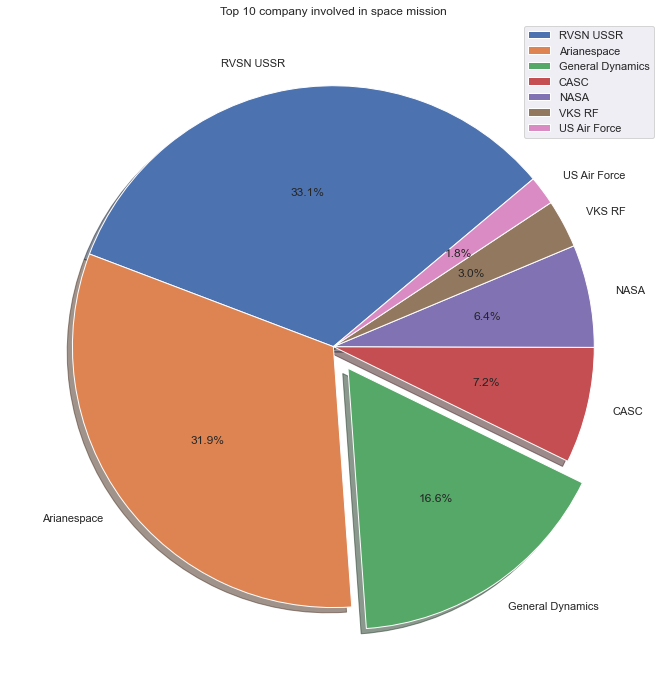

In [28]:
plt.figure(figsize = (15,12))


plt.pie(data['country'].value_counts().iloc[:7], 
        labels = ['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC','NASA','VKS RF', 'US Air Force'],
        shadow = True,
        labeldistance = 1.1,
        startangle = 40,
        explode = (0,0,0.1,0,0,0,0),
        autopct ='%1.1f%%',
       )

plt.legend(['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC','NASA','VKS RF', 'US Air Force'])
plt.title('Top 10 company involved in space mission')
plt.show()

Observation

From the datasets, 56 companies are involved in the manufacturing of space rockets. 

The plot gets clumsy if every company is plotted on it, so for visualization basis, I analyzed 7 top company that manufacture space rockets, this shows RVSN USSR to have the highest percentage of 33.1% followed by Arianespace(31.9%) to General Dynamics(16.6%) and the least is US Air Force with 1.8% manufactured.


# 5. Classifying the database on success and failure of the mission by the most popular companies.

Text(0, 0.5, 'Number manufactured')

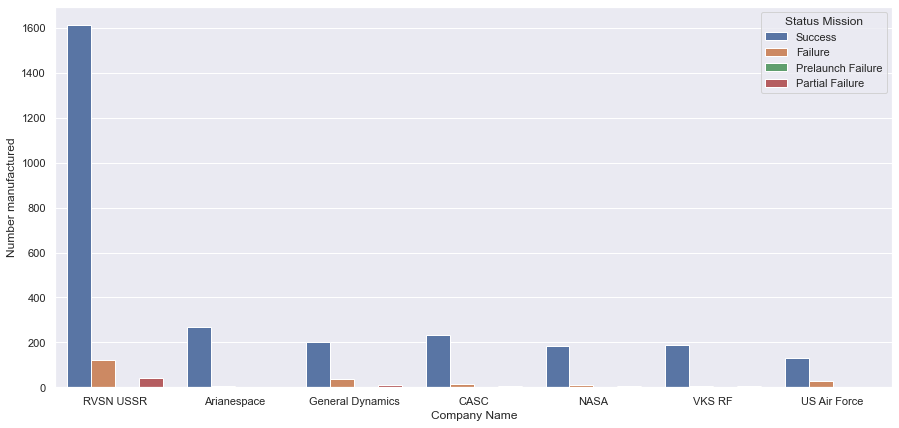

In [29]:
#relationship between company and mission status
plt.figure(figsize = (15,7))

sns.countplot(data['Company Name'],  data = data, hue = 'Status Mission', order =  ['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC','NASA', 'VKS RF', 'US Air Force'])
plt.ylabel('Number manufactured')

Observation

This shows that the highest success rate of space mission recorded was manufactured by RVSN USSR company and the least is US Air Force, I believe this high rate is because of the RVSN USSR company is the highest recorded manufacturer of space rockets and also because the US Air Force navy is the lowest. 

Also, from the plot above, all the companies have a high success rate compared to the rate of failed space missions. 


Text(0, 0.5, 'Number manufctured')

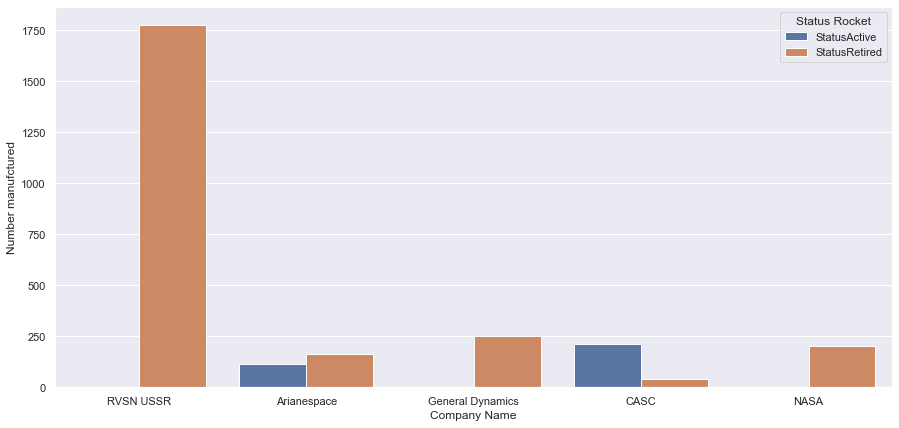

In [30]:
#relationship between company and rocket status
plt.figure(figsize = (15,7))

sns.countplot(data['Company Name'],  data = data, hue = 'Status Rocket', order =  ['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC','NASA'])
plt.ylabel ('Number manufctured')

# 6. Analysis of yearly and monthly distribution of space missions (launch)

In [31]:
#convert datum datatype from object to datetime to extract year and month features
month_function = lambda x:x.split( )[1]
data['month'] = data['Datum'].apply(month_function)

year_function = lambda x:x.split( )[3]
data['year'] = data['Datum'].apply(year_function)

data.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country,month,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,Aug,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,Aug,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,450.0,Success,USA,Aug,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Jul,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,Jul,2020


## A. Yearly space launch

Text(0.5, 1.0, 'Yearly space launch')

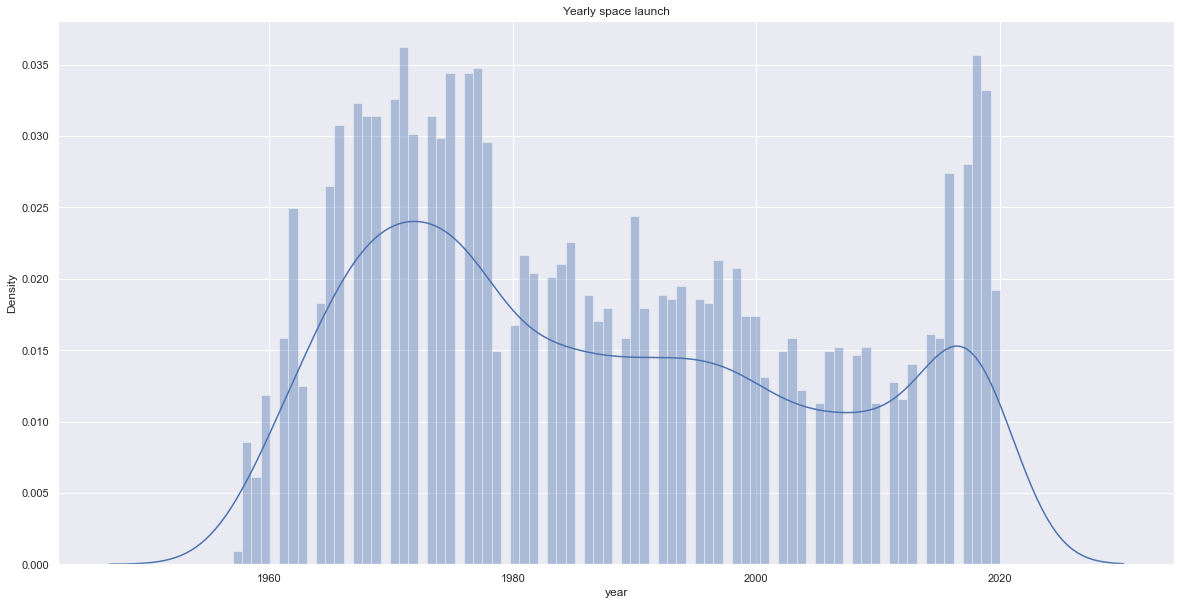

In [32]:
plt.figure(figsize=(20,10))
sns.distplot(data['year'], bins = 83)

plt.title('Yearly space launch')

Text(0.5, 0, 'Number of space launch')

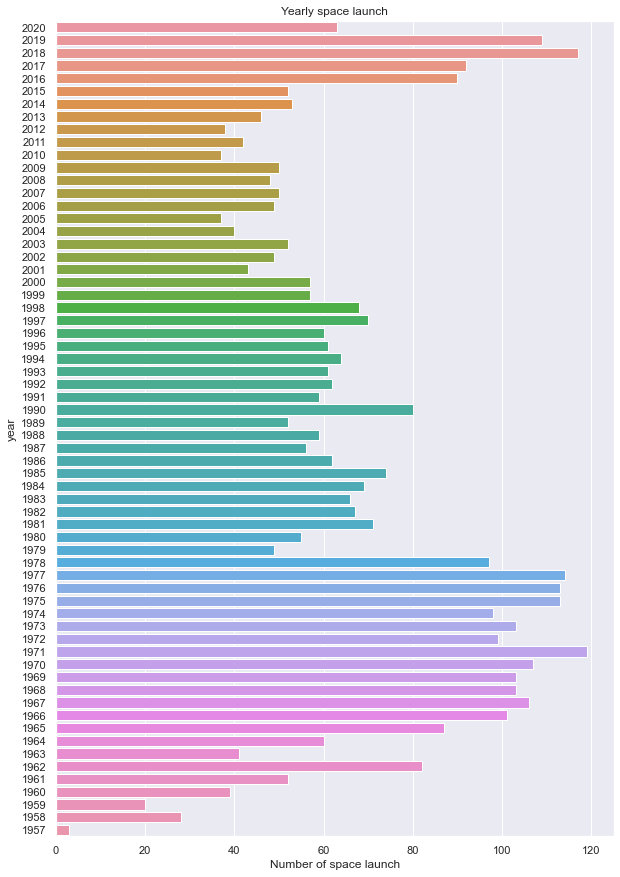

In [33]:
plt.figure(figsize=(10,15))
sns.countplot(y=data['year'])

plt.title ('Yearly space launch')
plt.xlabel ('Number of space launch')

Observation

From the plot, 2016 through 2020 and mid '60s to late '70s has high variation in the number of space launch missions per year while late '50s and early '20s has lower variations in the number of spaces launched by year.

# B. monthly space launch

In [34]:
data['month'].value_counts()

Dec    450
Jun    402
Apr    383
Oct    381
Aug    373
Sep    365
Mar    353
Jul    351
Feb    336
Nov    336
May    326
Jan    268
Name: month, dtype: int64

Text(0, 0.5, 'Number of space launch')

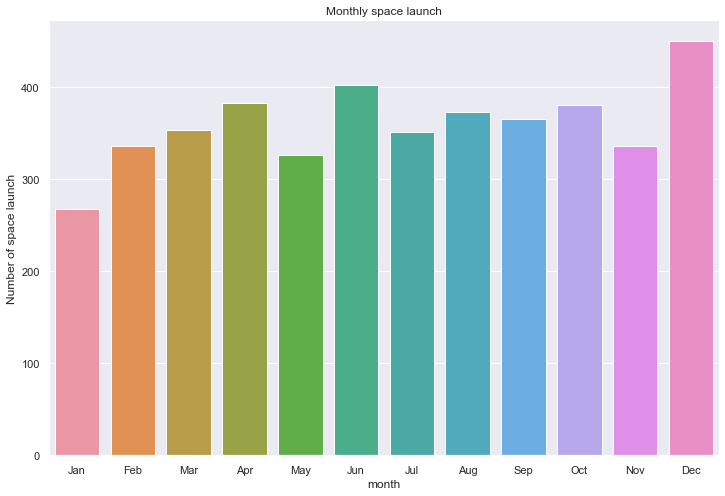

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(data['month'],order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title ('Monthly space launch')
plt.ylabel ('Number of space launch')

Observation

Observation shows, December has the highest number of space launches with over 400 launches monthly, followed by June with 402 launches to April with 383 launches and the least is January with 268 space launches monthly.